# **RAG SYSTEM**

## Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.2/437.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.4/359.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/5

In [ ]:
# use LangSmith to track traces (optional)

# import getpass
import os

os.environ["LANGSMITH_TRACING"] = "false" #set true if you want to use LangSmith
os.environ["TRACELOOP_TRACE_CONTENT"]="false"
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

### Using VertexAIEmbeddings, Google Gemini, Chroma(Vector DB)

In [ ]:
%pip install -qU "langchain[google-vertexai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.9/398.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.3/394.3 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.8 MB/s eta 0:00:00


In [ ]:
import vertexai
vertexai.init(project='cs391-project')

In [ ]:
# Ensure your VertexAI credentials are configured
import os

KEYFILE_PATH = '/content/drive/MyDrive/cs391-project-11f0f788cfea.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = KEYFILE_PATH

In [ ]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.0-flash-001", model_provider="google_vertexai")

In [ ]:
from langchain_google_vertexai import VertexAIEmbeddings
from google.oauth2 import service_account

# Create credentials object
credentials = service_account.Credentials.from_service_account_file(KEYFILE_PATH)

# Pass credentials to the embeddings model
embeddings = VertexAIEmbeddings(
    model="text-embedding-004",
    credentials=credentials
)

In [ ]:
%pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 39.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:

In [ ]:
%pip install opentelemetry-instrumentation-langchain
from langchain_chroma import Chroma

In [ ]:
vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
)

In [ ]:
import bs4
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph, END
from langchain_community.document_loaders import TextLoader
from typing import TypedDict, List, Annotated
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

## Basic Retrieval Process

In [ ]:
loader = TextLoader("/content/drive/MyDrive/RAG_data/merged_transcript.txt")

docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

# Index chunks
_ = vector_store.add_documents(documents=all_splits)

## Using additional context data (class notes in Latex)

In [ ]:
import os
import re

def merge_latex_files(input_files, output_file, prefix_text="Note"):
    """
    Merge multiple LaTeX files into one, adding markers to indicate source files.

    Args:
        input_files (list): List of input LaTeX file paths
        output_file (str): Output LaTeX file path
        prefix_text (str): Text to use as prefix for source indicators (default: "Note")
    """
    with open(output_file, 'w', encoding='utf-8') as outfile:
        # Write preamble - we'll take it from the first file
        if input_files:
            with open(input_files[0], 'r', encoding='utf-8') as first_file:
                content = first_file.read()

                # Extract the preamble (everything before \begin{document})
                preamble_match = re.search(r'(.*?)\\begin{document}', content, re.DOTALL)
                if preamble_match:
                    preamble = preamble_match.group(1)
                    outfile.write(preamble + "\n")
                else:
                    # If no \begin{document} found, assume it's a fragment and write a default preamble
                    outfile.write("\\documentclass{article}\n")
                    outfile.write("\\usepackage{amsmath}\n")
                    outfile.write("\\usepackage{amssymb}\n")
                    outfile.write("\\usepackage{graphicx}\n")
                    outfile.write("\\usepackage{hyperref}\n\n")

        # Write document start
        outfile.write("\\begin{document}\n\n")

        # Process each file
        for i, file_path in enumerate(input_files, 1):
            # Write a section header to indicate the source file
            file_name = os.path.basename(file_path)
            outfile.write(f"\\section*{{{prefix_text} {i}: {file_name}}}\n")
            outfile.write(f"\\addcontentsline{{toc}}{{section}}{{{prefix_text} {i}: {file_name}}}\n\n")

            with open(file_path, 'r', encoding='utf-8') as infile:
                content = infile.read()

                # Extract just the document body
                body_match = re.search(r'\\begin{document}(.*?)\\end{document}', content, re.DOTALL)
                if body_match:
                    # If the file has document tags, extract just the content between them
                    body = body_match.group(1)
                    outfile.write(body + "\n\n")
                else:
                    # If no document tags, assume the whole file is content
                    outfile.write(content + "\n\n")

        # Write document end
        outfile.write("\\end{document}\n")

In [ ]:
# Check if Latex files are stored in the right directory

OUTPUT_FILE_PATH = '/content/drive/MyDrive/RAG_data/note_merged.tex'
latex_file_list = [f'/content/drive/MyDrive/RAG_data/note_{num}.tex' for num in range (1, 14)]
merge_latex_files(latex_file_list, OUTPUT_FILE_PATH)

In [ ]:
from langchain.text_splitter import LatexTextSplitter

def split_latex_file(file_path, chunk_size=100, chunk_overlap=20):
    """
    Read LaTeX content from a file and split it into chunks.

    Args:
        file_path (str): Path to the LaTeX file
        chunk_size (int): Maximum size of each chunk
        chunk_overlap (int): Overlap between chunks

    Returns:
        list: List of LaTeX chunks
    """
    # Read the LaTeX content from the file
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            latex_text = file.read()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return []
    except Exception as e:
        print(f"Error reading file: {e}")
        return []

    # Create a splitter with the specified parameters
    splitter = LatexTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )

    # Split the text into chunks
    chunks = splitter.split_text(latex_text)
    return chunks

In [ ]:
OUTPUT_FILE_PATH = '/content/drive/MyDrive/RAG_data/note_merged.tex'
chunks = split_latex_file(OUTPUT_FILE_PATH)

### Merging the additional data from Latex chunks with original data from merged_transcript.txt

In [ ]:
# Convert latex chunks to Document objects
latex_documents = []
for i, chunk in enumerate(chunks):
    # Create Document object with page_content and metadata
    doc = Document(
        page_content=chunk,
        metadata={"source": f"{OUTPUT_FILE_PATH}", "chunk_id": i}
    )
    latex_documents.append(doc)

# Add the new LaTeX document chunks to the existing vector store
_ = vector_store.add_documents(documents=latex_documents)

## Running Pipeline and Evaluating

In [ ]:
!pip install --quiet pandas tqdm
import pandas as pd
from tqdm import tqdm

In [ ]:
# --- Define State ---
class RagState(TypedDict):
    question: str
    documents: List[Document]
    context_relevant: str
    answer: str

# --- Nodes ---
def retrieve_documents(state: RagState):
    documents = vector_store.similarity_search(state['question'], k=3)
    return {"documents": documents, "question": state['question']}

def grade_context_relevance(state: RagState):
    question = state['question']
    documents = state['documents']
    context_str = "\\n\\n---\\n\\n".join([doc.page_content for doc in documents])

    relevance_grader_prompt = PromptTemplate.from_template(
        """Given the following question and retrieved context, determine if the context is relevant to answer the question. Answer only 'YES' or 'NO'.
Question: {question}
Retrieved Context:\n{context}\nIs the context relevant?"""
    )
    grader_chain = relevance_grader_prompt | llm | StrOutputParser()
    relevance_decision = grader_chain.invoke({"question": question, "context": context_str})
    return {"context_relevant": relevance_decision.lower().strip()}

def generate_with_context(state: RagState):
    question = state['question']
    documents = state['documents']
    context_str = "\\n\\n---\\n\\n".join([doc.page_content for doc in documents])

    rag_prompt_template = PromptTemplate.from_template(
       """Use the following pieces of retrieved context to answer all aspects of the question directly. If you don't know the answer from the context, say that you cannot answer based on the provided information. Focus on extracting the most relevant information from the context to provide a concise and accurate answer. Keep the answer to a maximum of three sentences.

    Question: {question}
    Context:\n{context}\nAnswer:"""
    )
    rag_chain = rag_prompt_template | llm | StrOutputParser()
    answer = rag_chain.invoke({"question": question, "context": context_str})
    return {"answer": answer}

def generate_without_context(state: RagState):
    question = state['question']
    direct_qa_prompt = PromptTemplate.from_template(
        """Answer all aspects of the following question directly based on your general knowledge. Keep the answer to a maximum of three sentences.
Question: {question}
Answer:"""
    )
    direct_chain = direct_qa_prompt | llm | StrOutputParser()
    answer = direct_chain.invoke({"question": question})
    return {"answer": answer}

# --- Conditional Edge ---
def decide_generation_path(state: RagState):
    if state['context_relevant'] == 'yes':
        return "generate_with_context"
    else:
        return "generate_without_context"

In [ ]:
# --- Build Graph ---
graph_builder_new = StateGraph(RagState)

graph_builder_new.add_node("retrieve", retrieve_documents)
graph_builder_new.add_node("grade_relevance", grade_context_relevance)
graph_builder_new.add_node("generate_with_context", generate_with_context)
graph_builder_new.add_node("generate_without_context", generate_without_context)

graph_builder_new.set_entry_point("retrieve")
graph_builder_new.add_edge("retrieve", "grade_relevance")
graph_builder_new.add_conditional_edges(
    "grade_relevance",
    decide_generation_path,
    {
        "generate_with_context": "generate_with_context",
        "generate_without_context": "generate_without_context",
    },
)
graph_builder_new.add_edge("generate_with_context", END)
graph_builder_new.add_edge("generate_without_context", END)

# Compile the graph
adaptive_rag_graph = graph_builder_new.compile()

In [ ]:
import pickle

def load_eval_dataset(eval_dataset_path):
    # Read the results back from the pickle file for testing
    with open("/content/drive/MyDrive/"+eval_dataset_path, "rb") as f:
        loaded_results = pickle.load(f)
    return loaded_results

loaded_results = load_eval_dataset("generator_eval_dataset_gemini_v2.pkl")
print(f"Total number of questions: {len(loaded_results)}")
sample = loaded_results[:10]
for result in sample:
    print(result)
    print("-" * 35 + "\n")

Total number of questions: 112
{'question': 'In linear regression, what is the purpose of the design matrix $X$ and how is it used in calculating the weight vector $w$ using the normal equations?', 'answer': 'The design matrix $X$ contains the input features for each data point, arranged in rows. In the normal equations, it is used to calculate the weight vector $w$ as $w = (X^T X)^{-1} X^T y$, provided $X^T X$ is nonsingular, effectively solving for the optimal weights that minimize the squared error between predictions and actual values.'}
-----------------------------------

{'question': 'Given the equation $X = QR$ resulting from QR decomposition, and $Rw = Q^T y$, what are we solving for?', 'answer': 'We are solving for the vector $w$. This vector is the solution to a transformed linear system, obtained after applying QR decomposition to the matrix $X$.'}
-----------------------------------

{'question': 'According to the lecture, what mathematical areas are considered prerequisit

In [ ]:
# --- LLM-as-Judge Prompts ---

# Faithfulness Check Prompt
faithfulness_prompt_template = PromptTemplate.from_template(
    """Given the following retrieved context and question, evaluate if the generated answer is faithful to the context.
The answer should only contain information explicitly supported by the context. It should not add external information or contradict the context.

Question:
{question}

Context:
{context}

Answer:
{answer}

Is the answer faithful to the context? Respond with only 'YES' or 'NO'.
"""
)

# Answer Relevance Check Prompt
relevance_prompt_template = PromptTemplate.from_template(
    """Given the following question and answer, evaluate if the answer is relevant to the question.
The answer should directly address the question asked.

Question:
{question}

Answer:
{answer}

Is the answer relevant to the question? Respond with only 'YES' or 'NO'.
"""
)

# Context Relevance Check Prompt (for retriever evaluation)
context_relevance_prompt_template = PromptTemplate.from_template(
    """Given the following question and a retrieved context chunk, evaluate if the context chunk is relevant for answering the question.
The context chunk is relevant if it contains information that helps answer the question.

Question:
{question}

Context Chunk:
{context_chunk}

Is the context chunk relevant for answering the question? Respond with only 'YES' or 'NO'.
"""
)

output_parser = StrOutputParser()
faithfulness_chain = faithfulness_prompt_template | llm | output_parser
relevance_chain = relevance_prompt_template | llm | output_parser
context_relevance_chain = context_relevance_prompt_template | llm | output_parser

In [ ]:
all_evaluation_results = []
for item in tqdm(loaded_results[20:30]):
    original_question = item['question']
    ground_truth = item['answer']

    # Run the adaptive RAG graph
    final_state = adaptive_rag_graph.invoke({"question": original_question})

    # Extract results from the final state
    generated_answer = final_state.get('answer', '')
    retrieved_docs = final_state.get('documents', [])
    context_relevant = final_state.get('context_relevant', 'N/A')
    context_str = "\\n\\n---\\n\\n".join([doc.page_content for doc in retrieved_docs])

    # Determine Source Info
    source_info = "N/A" # Default
    if context_relevant == 'yes' and retrieved_docs:
        # Extract unique source filenames from metadata
        sources = set(doc.metadata.get('source', 'Unknown Source') for doc in retrieved_docs)
        source_info = ", ".join(sorted(list(sources))) # Comma-separated list of unique sources
    elif context_relevant == 'no':
        source_info = "LLM Knowledge (Context Not Relevant)"
    elif not retrieved_docs:
         source_info = "LLM Knowledge (No Context Retrieved)"


    # Perform post-generation evaluations
    relevance_input = {"question": original_question, "answer": generated_answer}
    answer_relevance_score = relevance_chain.invoke(relevance_input).strip()

    faithfulness_input = {
        "question": original_question,
        "context": context_str if context_str else "No context retrieved",
        "answer": generated_answer
    }
    faithfulness_score = faithfulness_chain.invoke(faithfulness_input).strip()

    context_relevance_scores = []
    context_relevance_output = "N/A (No context retrieved)"
    if retrieved_docs:
        for doc in retrieved_docs:
            context_relevance_input = {"question": original_question, "context_chunk": doc.page_content}
            score_str = context_relevance_chain.invoke(context_relevance_input)
            context_relevance_scores.append(score_str.lower().strip())

        relevant_chunks_count = sum(1 for score in context_relevance_scores if score == 'yes')
        context_precision = (relevant_chunks_count / len(retrieved_docs)) * 100
        context_relevance_value = f"{context_precision:.1f}%"
    else:
        context_relevance_value = "N/A"

    # Store all results
    all_evaluation_results.append({
        'Question': original_question,
        'Ground Truth': ground_truth,
        'Generated Answer': generated_answer,
        'Source Info': source_info,
        'Answer Relevance': answer_relevance_score,
        'Faithfulness': faithfulness_score,
        'Context Precision': context_relevance_value,
    })

# --- Display Final Results ---

print("\n--- Textual Comparisons ---")
for i, result in enumerate(all_evaluation_results):
    print(f"\n--- Comparison {i+1} ---")
    print(f"Question:\n{result['Question']}")
    print(f"Ground Truth:\n{result['Ground Truth']}")
    print(f"Generated Answer:\n{result['Generated Answer']}")
    print(f"Source Used:\n{result['Source Info']}")
    print("-" * 30)

print("\n\n--- Evaluation Metrics Summary ---")

# Prepare data for the DataFrame
metrics_data = []
for i, result in enumerate(all_evaluation_results):
    metrics_data.append({
        '#': i + 1,
        'Answer Relevance': result['Answer Relevance'],
        'Faithfulness': result['Faithfulness'],
        'Context Precision': result['Context Precision'],
        'Source Used': result['Source Info']\
    })

# Create and display the DataFrame
df_metrics = pd.DataFrame(metrics_data)
df_metrics.set_index('#', inplace=True)
display(df_metrics)

print("\n\n--- Overall Results ---")
overall_metrics = {
    'Answer Relevance': str(len(df_metrics[df_metrics['Answer Relevance'] == 'YES']) / len(df_metrics) * 100)+"%",
    'Faithfulness': str(len(df_metrics[df_metrics['Faithfulness'] == 'YES']) / len(df_metrics) * 100)+"%",
    'Context Precision': str(df_metrics['Context Precision'].str.rstrip('%').replace('N/A', '0').astype(float).mean())+"%"
}
df_overall = pd.DataFrame(overall_metrics, index=['Avg']).T
display(df_overall)

100%|██████████| 10/10 [00:25<00:00,  2.55s/it]


--- Textual Comparisons ---

--- Comparison 1 ---
Question:
Given a matrix X of dimensions (d+1) x N, where each column represents a training data point with d features plus a bias term, and a weight vector W in R^(d+1), how can you express the prediction for all N data points using X and W?
Ground Truth:
The prediction can be expressed as X^T * W, where X^T is the transpose of matrix X. This results in a vector of N predictions, one for each data point, by taking the inner product between each column of X and the weight vector W.
Generated Answer:
The prediction for all N data points can be expressed as XW, where X is the (d+1) x N matrix and W is the weight vector. This represents the prediction on the training data.

Source Used:
/content/drive/MyDrive/RAG_data/merged_transcript.txt, /content/drive/MyDrive/RAG_data/note_merged.tex
------------------------------

--- Comparison 2 ---
Question:
Given that F(w) = ||Xw - y||_2^2 represents the squared L2 norm, and this function is quad

,Answer Relevance,Faithfulness,Context Precision,Source Used
#,,,,
1,NO,YES,100.0%,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,33.3%,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,33.3%,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,100.0%,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,100.0%,/content/drive/MyDrive/RAG_data/merged_transcr...
6,NO,YES,66.7%,/content/drive/MyDrive/RAG_data/note_merged.tex
7,YES,YES,66.7%,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,100.0%,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,100.0%,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,80.0%
Faithfulness,100.0%
Context Precision,80.0%


### Testing with different embeddings

1. OpenAI (text-embedding-3-large)

In [ ]:
!pip install openai langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.3/661.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.8/351.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.7 MB/s eta 0:00:00


In [ ]:
import getpass
import os

# if not os.environ.get("OPENAI_API_KEY"):
os.environ["OPENAI_API_KEY"] = ''

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

### Pipeline Code

In [ ]:
import os
import pickle
import pandas as pd
from tqdm import tqdm
from typing import TypedDict, List
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter, LatexTextSplitter
from langchain_chroma import Chroma
from langgraph.graph import StateGraph, END
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.document_loaders import TextLoader
import time
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Define State ---
class RagStateEval(TypedDict):
    question: str
    documents: List[Document]
    context_relevant: str
    answer: str
    k: int

def evaluate_rag_configuration(chunk_size: int, chunk_overlap: int, k_retrieval: int, use_rag: bool, embeddings, eval_dataset, show_textual_comparisons): # NOTE: Relies on global llm, faithfulness_chain, relevance_chain, context_relevance_chain, split_latex_file, OUTPUT_FILE_PATH

    # --- 1. Data Loading and Processing ---
    vector_store = Chroma(
        collection_name=f"eval_collection_{time.time()}",
        embedding_function=embeddings,
    )

    # Load transcript data
    loader = TextLoader("/content/drive/MyDrive/RAG_data/merged_transcript.txt")
    transcript_docs = loader.load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    transcript_splits = text_splitter.split_documents(transcript_docs)
    vector_store.add_documents(documents=transcript_splits)

    # Add documents in smaller batches to avoid token limit errors
    # batch_size = 100  # Adjust this number based on your document sizes
    # for i in range(0, len(transcript_splits), batch_size):
    #     batch_end = min(i + batch_size, len(transcript_splits))
    #     vector_store.add_documents(documents=transcript_splits[i:batch_end])
    #     print(f"Added batch {i//batch_size + 1}/{(len(transcript_splits) + batch_size - 1)//batch_size} of transcript documents")

    # Load LaTeX data
    latex_chunks_text = split_latex_file(OUTPUT_FILE_PATH, chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    latex_documents = []
    for i, chunk in enumerate(latex_chunks_text):
         doc = Document(
             page_content=chunk,
             metadata={"source": f"{OUTPUT_FILE_PATH}", "chunk_id": i}
         )
         latex_documents.append(doc)
    vector_store.add_documents(documents=latex_documents)

    # --- 3. Graph Definition (Nodes adapted for parameterization) ---
    def retrieve_documents_eval(state: RagStateEval):
        documents = vector_store.similarity_search(state['question'], k=state['k'])
        return {"documents": documents, "question": state['question'], "k": state['k']}

    def grade_context_relevance_eval(state: RagStateEval):
        question = state['question']
        documents = state['documents']
        context_str = "\n\n---\n\n".join([doc.page_content for doc in documents]) if documents else ""
        relevance_grader_prompt = PromptTemplate.from_template(
             """Given the following question and retrieved context, determine if the context is relevant to answer the question. Answer only 'YES' or 'NO'.
Question: {question}
Retrieved Context:\n{context}\nIs the context relevant?"""
        )
        grader_chain = relevance_grader_prompt | llm | StrOutputParser()
        if not documents: # Handle case with no documents
             relevance_decision = 'no'
        else:
             relevance_decision = grader_chain.invoke({"question": question, "context": context_str})
        return {"context_relevant": relevance_decision.lower().strip(), "documents": documents, "question": state['question'], "k": state['k']}


    def generate_with_context_eval(state: RagStateEval):
        question = state['question']
        documents = state['documents']
        context_str = "\n\n---\n\n".join([doc.page_content for doc in documents])
        rag_prompt_template = PromptTemplate.from_template(
                """Use the following pieces of retrieved context (lecture notes and transcripts) to answer all aspects of the question directly.
        Question:\n{question}\nContext:
        {context}\nAnswer:
        1. Provide a concise answer (max 3 sentences).
        2. After generating, verify each claim against universal truths (math/physics laws); if any part isn’t reliable or doesn't answer the question accurately, correct it using your knowledge—but do NOT alter anything drawn straight from the context. Make sure overall answer is 3 sentences maximum."""
        )
        rag_chain = rag_prompt_template | llm | StrOutputParser()
        answer = rag_chain.invoke({"question": question, "context": context_str})
        return {"answer": answer, "documents": documents, "question": state['question'], "k": state['k'], "context_relevant": state['context_relevant']} # Pass other state vars


    def generate_without_context_eval(state: RagStateEval):
        question = state['question']
        direct_qa_prompt = PromptTemplate.from_template(
             """Answer all aspects of the following question directly based on your general knowledge. Keep the answer to a maximum of three sentences.
Question: {question}
Answer:"""
        )
        direct_chain = direct_qa_prompt | llm | StrOutputParser()
        answer = direct_chain.invoke({"question": question})
        # Ensure state consistency, documents might be empty or from retrieval attempt
        return {"answer": answer, "documents": state.get('documents', []), "question": state['question'], "k": state['k'], "context_relevant": 'no'}


    def decide_generation_path_eval(state: RagStateEval):
        return "generate_with_context_eval" if state.get('context_relevant') == 'yes' else "generate_without_context_eval"

    # --- 4. Graph Building (Conditional based on use_rag) ---
    if use_rag:
        graph_builder_eval = StateGraph(RagStateEval)
        graph_builder_eval.add_node("retrieve_eval", retrieve_documents_eval)
        graph_builder_eval.add_node("grade_relevance_eval", grade_context_relevance_eval)
        graph_builder_eval.add_node("generate_with_context_eval", generate_with_context_eval)
        graph_builder_eval.add_node("generate_without_context_eval", generate_without_context_eval)

        graph_builder_eval.set_entry_point("retrieve_eval")
        graph_builder_eval.add_edge("retrieve_eval", "grade_relevance_eval")
        graph_builder_eval.add_conditional_edges(
            "grade_relevance_eval",
            decide_generation_path_eval,
            {
                "generate_with_context_eval": "generate_with_context_eval",
                "generate_without_context_eval": "generate_without_context_eval",
            },
        )
        graph_builder_eval.add_edge("generate_with_context_eval", END)
        graph_builder_eval.add_edge("generate_without_context_eval", END)
        pipeline = graph_builder_eval.compile()
    else:
        # Define a simple pipeline for direct QA if use_rag is False
        # This bypasses retrieval and grading
         direct_qa_prompt = PromptTemplate.from_template(
             """Answer all aspects of the following question directly based on your general knowledge. Keep the answer to a maximum of three sentences.
Question: {question}
Answer:"""
         )
         pipeline = direct_qa_prompt | llm | StrOutputParser()


    # --- 5. Evaluation Loop ---
    all_evaluation_results = []

    for item in tqdm(eval_dataset):
        original_question = item['question']
        ground_truth = item['answer']
        cos_sim = 0.0

        if use_rag:
            # Run the adaptive RAG graph
            final_state = pipeline.invoke({"question": original_question, "k": k_retrieval})
            generated_answer = final_state.get('answer', '')
            retrieved_docs = final_state.get('documents', [])
            context_str = "\n\n---\n\n".join([doc.page_content for doc in retrieved_docs]) if retrieved_docs else ""
            # LLM-as-judge evaluations using global chains
            answer_relevance_score = relevance_chain.invoke({"question": original_question, "answer": generated_answer}).strip()
            faithfulness_score = faithfulness_chain.invoke({"question": original_question, "context": context_str if context_str else "No context retrieved", "answer": generated_answer}).strip()
            context_precision_value = "N/A"
            if retrieved_docs:
                 context_relevance_scores = [context_relevance_chain.invoke({"question": original_question, "context_chunk": doc.page_content}).lower().strip() for doc in retrieved_docs]
                 relevant_chunks_count = sum(1 for score in context_relevance_scores if score == 'yes')
                 context_precision = (relevant_chunks_count / len(retrieved_docs)) * 100 if retrieved_docs else 0
                 context_precision_value = f"{context_precision:.1f}%"
            source_used = ", ".join(sorted(list(set(doc.metadata.get('source', 'Unknown') for doc in retrieved_docs)))) if retrieved_docs else "LLM Knowledge"

        else: # Direct Q&A
            generated_answer = pipeline.invoke({"question": original_question})
            retrieved_docs = []
            context_str = ""
            # Evaluate relevance, others are N/A for direct Q&A using global chain
            answer_relevance_score = relevance_chain.invoke({"question": original_question, "answer": generated_answer}).strip()
            faithfulness_score = "N/A"
            context_precision_value = "N/A"
            source_used = "LLM Knowledge (Direct Q&A)"

        embeddings_list = embeddings.embed_documents([ground_truth, generated_answer])
        gt_embedding = np.array(embeddings_list[0]).reshape(1, -1)
        gen_embedding = np.array(embeddings_list[1]).reshape(1, -1)
        cos_sim = cosine_similarity(gt_embedding, gen_embedding)[0][0]


        all_evaluation_results.append({
            'Question': original_question,
            'Ground Truth': ground_truth,
            'Generated Answer': generated_answer,
            'Source Used': source_used,
            'Answer Relevance': answer_relevance_score,
            'Faithfulness': faithfulness_score,
            'Context Precision': context_precision_value,
            'Cosine Similarity': cos_sim,
            'Retrieved Docs': retrieved_docs
        })

    # --- 6. Display Results ---
    if show_textual_comparisons:
        print("--- Textual Comparisons ---\n")
        for idx, r in enumerate(all_evaluation_results, 1):
            print(f"--- Comparison {idx} ---")
            print("Question:")
            print(r['Question'])
            print("Ground Truth:")
            print(r['Ground Truth'])
            print("Generated Answer:")
            print(r['Generated Answer'])
            print("Source Used:")
            print(r['Source Used'])
            print("------------------------------\n")

    metrics_data = []
    for i, result in enumerate(all_evaluation_results):
        metrics_data.append({
            '#': i + 1,
            'Answer Relevance': result['Answer Relevance'],
            'Faithfulness': result['Faithfulness'],
            'Context Precision': result['Context Precision'],
            'Cosine Similarity': f"{result['Cosine Similarity']:.3f}",
            'Source Used': result['Source Used']
        })

    df_metrics = pd.DataFrame(metrics_data)
    df_metrics.set_index('#', inplace=True)
    print("\n--- Evaluation Metrics Summary ---")
    display(df_metrics)

    # Calculate overall metrics, handling 'N/A' and converting similarity
    ar_valid = df_metrics[df_metrics['Answer Relevance'] != 'N/A']
    f_valid = df_metrics[df_metrics['Faithfulness'] != 'N/A']
    cp_valid = df_metrics[df_metrics['Context Precision'] != 'N/A']['Context Precision'].str.rstrip('%').astype(float)
    cs_valid = pd.to_numeric(df_metrics['Cosine Similarity'], errors='coerce').dropna()

    overall_ar = (len(ar_valid[ar_valid['Answer Relevance'] == 'YES']) / len(ar_valid) * 100) if not ar_valid.empty else 0
    overall_f = (len(f_valid[f_valid['Faithfulness'] == 'YES']) / len(f_valid) * 100) if not f_valid.empty else 0
    overall_cp = cp_valid.mean() if not cp_valid.empty else 0
    overall_cs = cs_valid.mean() if not cs_valid.empty else 0

    overall_metrics_dict = {
        'Answer Relevance': f"{overall_ar:.1f}%",
        'Faithfulness': f"{overall_f:.1f}%" if not f_valid.empty else "N/A",
        'Context Precision': f"{overall_cp:.1f}%" if not cp_valid.empty else "N/A",
        'Cosine Similarity': f"{overall_cs:.3f}"
    }

    df_overall = pd.DataFrame(overall_metrics_dict, index=['Avg']).T
    print("\n\n--- Overall Results ---")
    display(df_overall)
    vector_store.delete_collection()

    return df_metrics, df_overall

In [ ]:
# chunk_sizes = [500, 1000, 1500, 2000]
# overlap = 200
# k = 10
# use_rag = True
# eval_gemini = load_eval_dataset("generator_eval_dataset_gemini_v2.pkl")
# eval_dataset = random.sample(eval_gemini, 50)
# relevance_scores = []
# faithfulness_scores = []
# context_precision_scores = []


# for chunk_size in chunk_sizes:
#     rag_results, rag_summary = evaluate_rag_configuration(chunk_size, overlap, k, use_rag, embeddings, eval_dataset, show_textual_comparisons=False)

#     # Extract average metrics
#     avg = rag_summary['Avg'].str.rstrip('%').astype(float)
#     relevance_scores.append(avg['Answer Relevance'])
#     faithfulness_scores.append(avg['Faithfulness'])
#     context_precision_scores.append(avg['Context Precision'])

# plt.figure(figsize=(10, 6))
# plt.plot(chunk_sizes, relevance_scores, label='Answer Relevance')
# plt.plot(chunk_sizes, faithfulness_scores, label='Faithfulness')
# plt.plot(chunk_sizes, context_precision_scores, label='Context Precision')
# plt.xlabel('Chunk Size')
# plt.ylabel('Score (%)')
# plt.title('Chunk Size vs. Evaluation Metrics')
# plt.legend()
# plt.grid(True)
# plt.show()

100%|██████████| 50/50 [04:18<00:00,  5.18s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,60.0%,0.792,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,90.0%,0.738,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,100.0%,0.882,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,100.0%,0.861,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,100.0%,0.767,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,90.0%,0.679,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,20.0%,0.894,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,60.0%,0.876,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,100.0%,0.829,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,96.0%
Faithfulness,100.0%
Context Precision,79.6%
Cosine Similarity,0.828


BadRequestError: Error code: 400 - {'error': {'message': 'Requested 307892 tokens, max 300000 tokens per request', 'type': 'max_tokens_per_request', 'param': None, 'code': 'max_tokens_per_request'}}

### Plotting different embedding models

In [ ]:
# Define the embedding models to compare
def get_embedding_models():
    # OpenAI embeddings
    from langchain_openai import OpenAIEmbeddings
    openai_embeddings = OpenAIEmbeddings(
        model="text-embedding-ada-002",
        openai_api_key="your-openai-api-key"  # Replace with your API key or use environment variable
    )

    # Gemini/Vertex AI embeddings
    from langchain_google_vertexai import VertexAIEmbeddings
    vertex_embeddings = VertexAIEmbeddings(
        model_name="textembedding-gecko",
        project="your-gcp-project",  # Replace with your GCP project or use environment variable
    )

    return {
        "OpenAI Ada-002": openai_embeddings,
        "Google VertexAI": vertex_embeddings
    }

# Parameters for evaluation
chunk_sizes = [1000]  # Using a single chunk size for model comparison
overlap = 200
k = 10
use_rag = True
eval_gemini = load_eval_dataset("generator_eval_dataset_gemini_v2.pkl")
eval_dataset = random.sample(eval_gemini, 50)

# Dictionary to store results for each model
model_results = {}

# Get embedding models
embedding_models = get_embedding_models()

# Run evaluation for each embedding model
for model_name, embeddings in embedding_models.items():
    print(f"Evaluating with {model_name} embeddings...")

    _, rag_summary = evaluate_rag_configuration(
        chunk_sizes[0], overlap, k, use_rag,
        embeddings, eval_dataset, show_textual_comparisons=False
    )

    # Extract average metrics
    avg = rag_summary['Avg'].str.rstrip('%').astype(float)

    # Store results
    model_results[model_name] = {
        'Answer Relevance': avg['Answer Relevance'],
        'Faithfulness': avg['Faithfulness'],
        'Context Precision': avg['Context Precision'],
        'Cosine Similarity': avg['Cosine Similarity'] * 100  # Convert to percentage for consistent plotting
    }

# Prepare data for plotting
models = list(model_results.keys())
metrics = ['Answer Relevance', 'Faithfulness', 'Context Precision']

# Set up bar chart
plt.figure(figsize=(12, 8))
x = np.arange(len(metrics))
width = 0.35
multiplier = 0

# Plot bars for each model
for model_name, results in model_results.items():
    offset = width * multiplier
    values = [results[metric] for metric in metrics]
    plt.bar(x + offset, values, width, label=model_name)
    multiplier += 1

# Customize the plot
plt.ylabel('Score (%)')
plt.title('RAG Performance Comparison Across Different Embedding Models')
plt.xticks(x + width/2, metrics)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(models))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, model_name in enumerate(models):
    results = model_results[model_name]
    for j, metric in enumerate(metrics):
        plt.text(j + width*i, results[metric] + 1,
                 f"{results[metric]:.1f}%",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Also create a separate plot for Cosine Similarity
plt.figure(figsize=(10, 6))
cosine_values = [results['Cosine Similarity'] for results in model_results.values()]
plt.bar(models, cosine_values, width=0.6)
plt.ylabel('Cosine Similarity (%)')
plt.title('Cosine Similarity Comparison Across Embedding Models')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, value in enumerate(cosine_values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Evaluating with OpenAI text-embedding-3-large embeddings...
Added batch 1/10 of transcript documents
Added batch 2/10 of transcript documents
Added batch 3/10 of transcript documents
Added batch 4/10 of transcript documents
Added batch 5/10 of transcript documents
Added batch 6/10 of transcript documents
Added batch 7/10 of transcript documents
Added batch 8/10 of transcript documents
Added batch 9/10 of transcript documents
Added batch 10/10 of transcript documents


100%|██████████| 50/50 [04:01<00:00,  4.83s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,50.0%,0.882,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,90.0%,0.777,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,60.0%,0.897,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,80.0%,0.748,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,90.0%,0.892,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,30.0%,0.795,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,100.0%,0.808,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,80.0%,0.781,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,100.0%,0.833,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,98.0%
Faithfulness,100.0%
Context Precision,77.6%
Cosine Similarity,0.858


Evaluating with Google VertexAI embeddings...
Added batch 1/10 of transcript documents
Added batch 2/10 of transcript documents
Added batch 3/10 of transcript documents
Added batch 4/10 of transcript documents
Added batch 5/10 of transcript documents
Added batch 6/10 of transcript documents
Added batch 7/10 of transcript documents
Added batch 8/10 of transcript documents
Added batch 9/10 of transcript documents
Added batch 10/10 of transcript documents


100%|██████████| 50/50 [03:29<00:00,  4.18s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,60.0%,0.964,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,70.0%,0.826,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,70.0%,0.967,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,70.0%,0.948,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,90.0%,0.967,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,40.0%,0.892,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,100.0%,0.893,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,90.0%,0.858,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,70.0%,0.972,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,100.0%
Faithfulness,98.0%
Context Precision,75.6%
Cosine Similarity,0.924


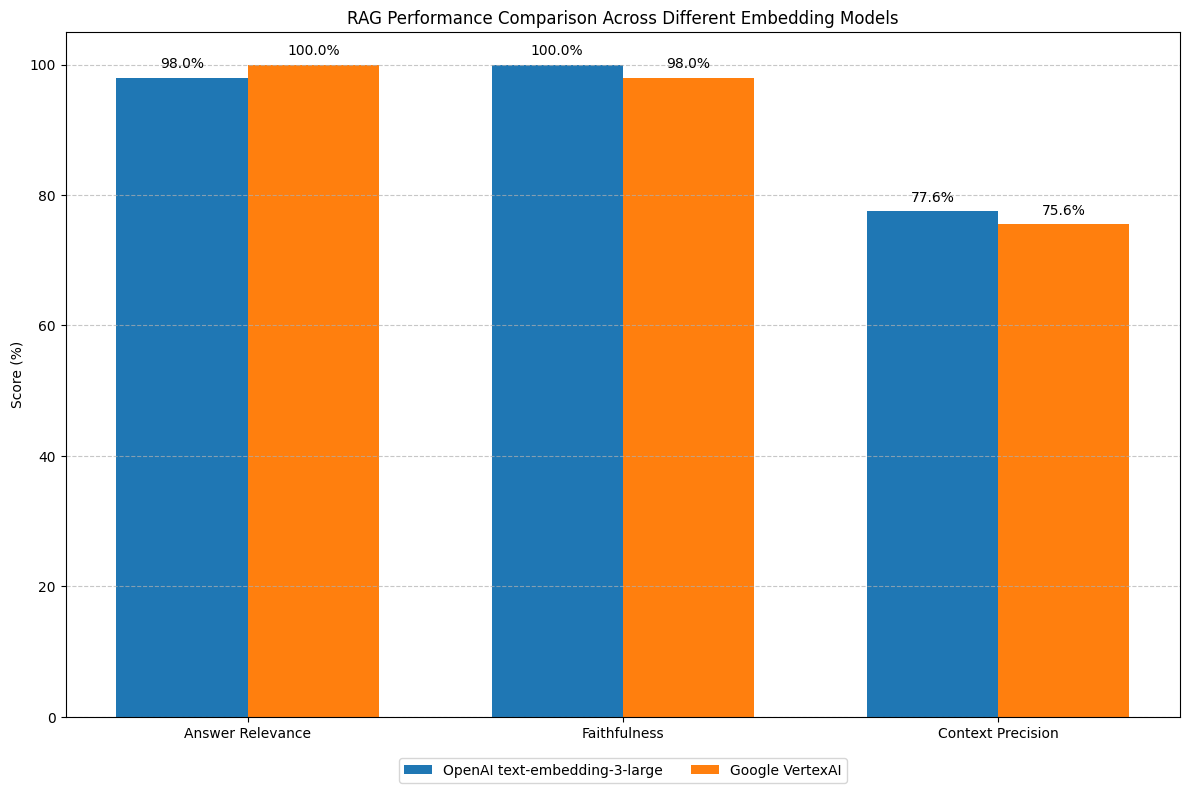

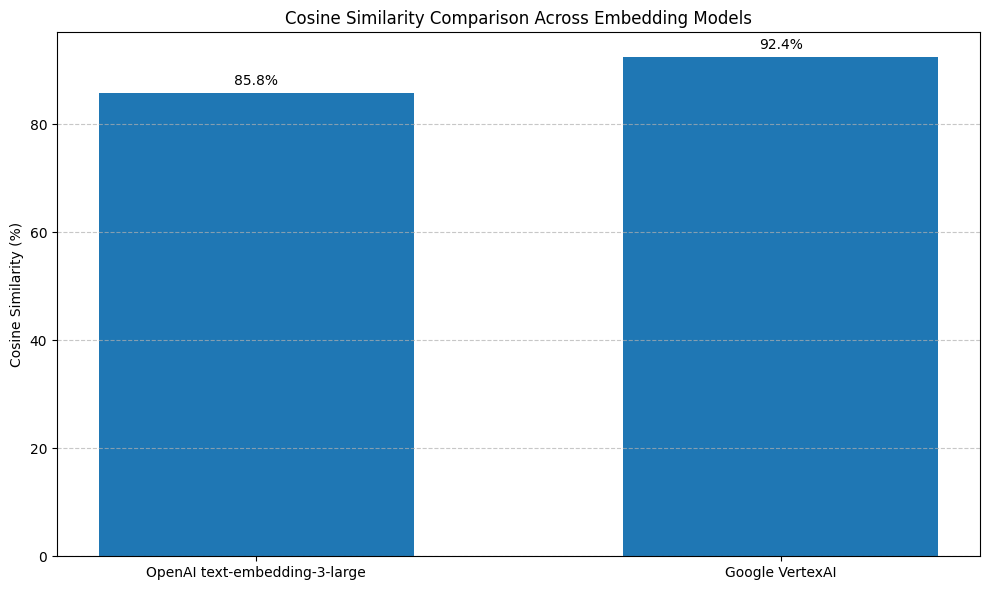

In [ ]:
# Define the embedding models to compare
def get_embedding_models():
    # OpenAI embeddings
    openai_embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

    # Gemini/Vertex AI embeddings
    vertex_embeddings = VertexAIEmbeddings(model="text-embedding-004")

    return {
        "OpenAI text-embedding-3-large": openai_embeddings,
        "Google VertexAI": vertex_embeddings
    }

# Parameters for evaluation
chunk_sizes = [1000]  # Using a single chunk size for model comparison
overlap = 200
k = 10
use_rag = True
eval_gemini = load_eval_dataset("generator_eval_dataset_gemini_v2.pkl")
eval_dataset = random.sample(eval_gemini, 50)

# Dictionary to store results for each model
model_results = {}

# Get embedding models
embedding_models = get_embedding_models()

# Run evaluation for each embedding model
for model_name, embeddings in embedding_models.items():
    print(f"Evaluating with {model_name} embeddings...")

    _, rag_summary = evaluate_rag_configuration(
        chunk_sizes[0], overlap, k, use_rag,
        embeddings, eval_dataset, show_textual_comparisons=False
    )

    # Extract average metrics
    avg = rag_summary['Avg'].str.rstrip('%').astype(float)

    # Store results
    model_results[model_name] = {
        'Answer Relevance': avg['Answer Relevance'],
        'Faithfulness': avg['Faithfulness'],
        'Context Precision': avg['Context Precision'],
        'Cosine Similarity': avg['Cosine Similarity'] * 100  # Convert to percentage for consistent plotting
    }

# Prepare data for plotting
models = list(model_results.keys())
metrics = ['Answer Relevance', 'Faithfulness', 'Context Precision']

# Set up bar chart
plt.figure(figsize=(12, 8))
x = np.arange(len(metrics))
width = 0.35
multiplier = 0

# Plot bars for each model
for model_name, results in model_results.items():
    offset = width * multiplier
    values = [results[metric] for metric in metrics]
    plt.bar(x + offset, values, width, label=model_name)
    multiplier += 1

# Customize the plot
plt.ylabel('Score (%)')
plt.title('RAG Performance Comparison Across Different Embedding Models')
plt.xticks(x + width/2, metrics)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(models))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, model_name in enumerate(models):
    results = model_results[model_name]
    for j, metric in enumerate(metrics):
        plt.text(j + width*i, results[metric] + 1,
                 f"{results[metric]:.1f}%",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Also create a separate plot for Cosine Similarity
plt.figure(figsize=(10, 6))
cosine_values = [results['Cosine Similarity'] for results in model_results.values()]
plt.bar(models, cosine_values, width=0.6)
plt.ylabel('Cosine Similarity (%)')
plt.title('Cosine Similarity Comparison Across Embedding Models')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, value in enumerate(cosine_values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Plotting different evaluation datasets

Evaluating with Gemini Dataset...
Original dataset size: 112, After cleaning: 112


100%|██████████| 50/50 [03:27<00:00,  4.16s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,90.0%,0.864,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,100.0%,0.917,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,100.0%,0.941,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,90.0%,0.965,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,60.0%,0.943,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,10.0%,0.954,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,70.0%,0.927,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,40.0%,0.888,/content/drive/MyDrive/RAG_data/merged_transcr...
9,NO,YES,40.0%,0.910,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,98.0%
Faithfulness,98.0%
Context Precision,69.8%
Cosine Similarity,0.916


Evaluating with Claude Dataset...
Original dataset size: 116, After cleaning: 116


100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,80.0%,0.926,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,90.0%,0.940,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,80.0%,0.874,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,80.0%,0.923,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,90.0%,0.928,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,100.0%,0.911,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,50.0%,0.944,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,60.0%,0.935,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,70.0%,0.938,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,100.0%
Faithfulness,100.0%
Context Precision,79.4%
Cosine Similarity,0.922


Evaluating with Agreed Dataset...
Original dataset size: 108, After cleaning: 107


100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


--- Evaluation Metrics Summary ---


,Answer Relevance,Faithfulness,Context Precision,Cosine Similarity,Source Used
#,,,,,
1,YES,YES,50.0%,0.954,/content/drive/MyDrive/RAG_data/merged_transcr...
2,YES,YES,70.0%,0.953,/content/drive/MyDrive/RAG_data/merged_transcr...
3,YES,YES,70.0%,0.912,/content/drive/MyDrive/RAG_data/merged_transcr...
4,YES,YES,80.0%,0.933,/content/drive/MyDrive/RAG_data/merged_transcr...
5,YES,YES,80.0%,0.961,/content/drive/MyDrive/RAG_data/merged_transcr...
6,YES,YES,100.0%,0.947,/content/drive/MyDrive/RAG_data/merged_transcr...
7,YES,YES,70.0%,0.873,/content/drive/MyDrive/RAG_data/merged_transcr...
8,YES,YES,50.0%,0.902,/content/drive/MyDrive/RAG_data/merged_transcr...
9,YES,YES,80.0%,0.831,/content/drive/MyDrive/RAG_data/merged_transcr...




--- Overall Results ---


,Avg
Answer Relevance,98.0%
Faithfulness,100.0%
Context Precision,70.8%
Cosine Similarity,0.922


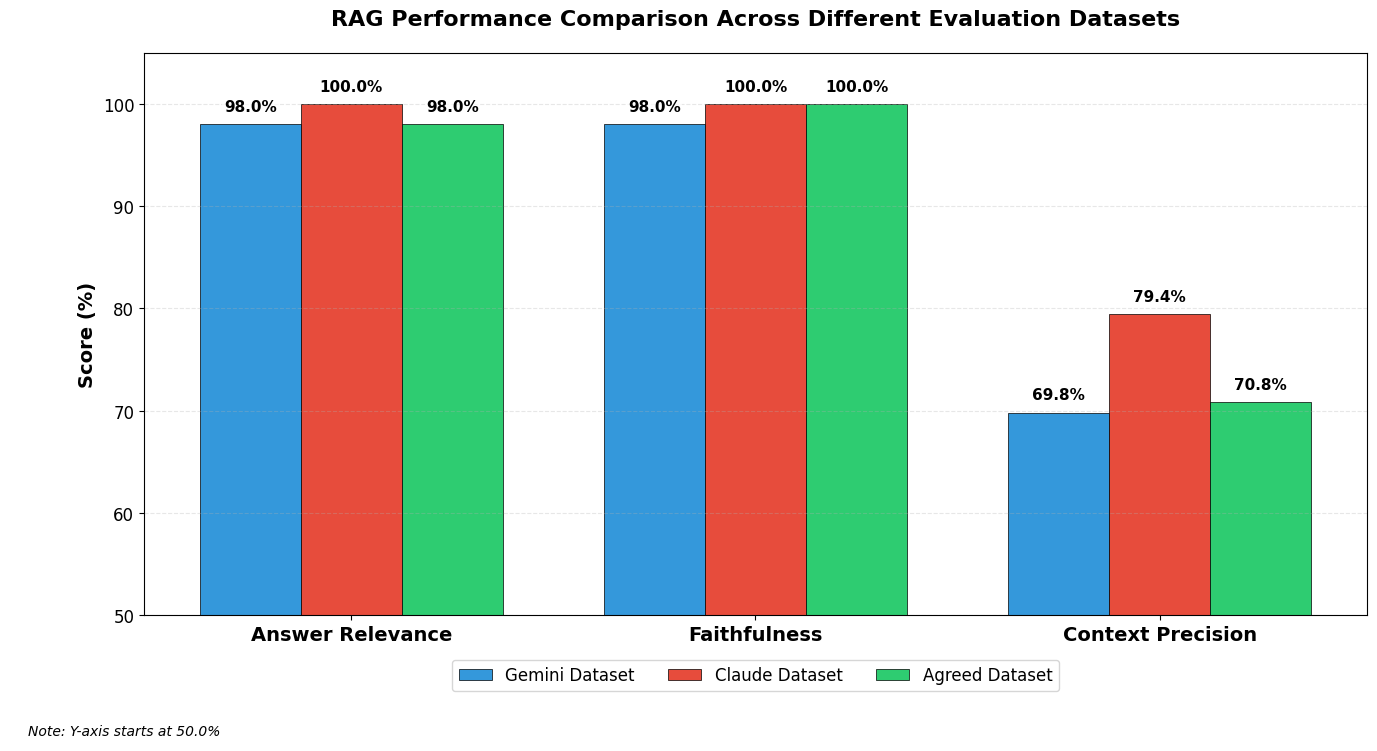

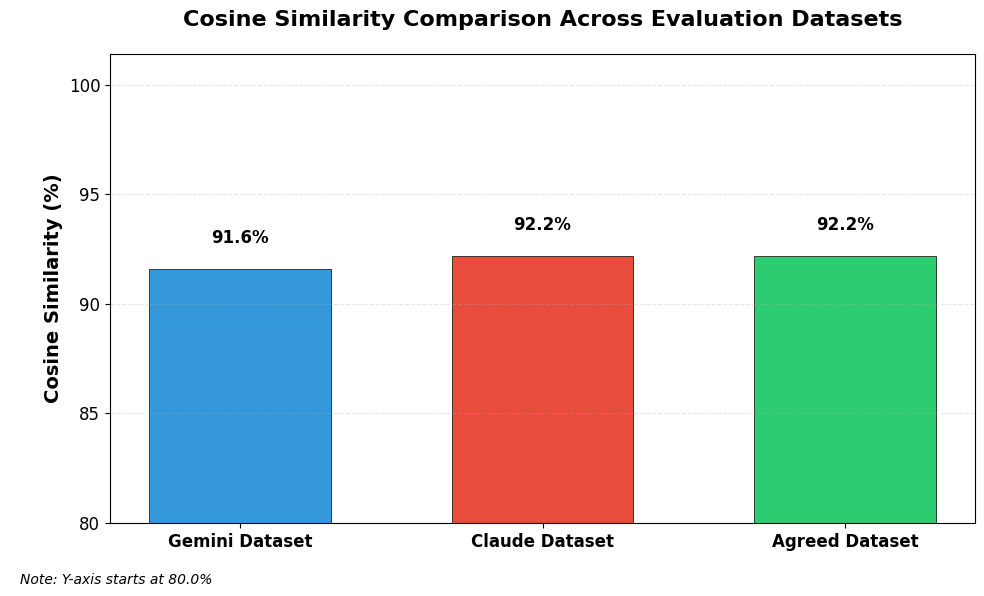

In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

def load_eval_dataset(eval_dataset_path):
    # Read the results back from the pickle file for testing
    with open("/content/drive/MyDrive/"+eval_dataset_path, "rb") as f:
        loaded_results = pickle.load(f)
    return loaded_results

# Function to filter invalid items from datasets
def clean_dataset(dataset):
    # Filter out None values and items without required keys
    valid_items = []
    for item in dataset:
        if item is not None and isinstance(item, dict) and 'question' in item and 'answer' in item:
            if item['question'] is not None and item['answer'] is not None:
                valid_items.append(item)
    return valid_items

# List of evaluation datasets to compare
dataset_paths = [
    "generator_eval_dataset_gemini_v2.pkl",
    "generator_eval_dataset_gpt-4o-mini_v2.pkl",
    "generator_eval_dataset_agreed_v2.pkl"
]

# Better dataset names for display
dataset_display_names = {
    "generator_eval_dataset_gemini_v2.pkl": "Gemini Dataset",
    "generator_eval_dataset_gpt-4o-mini_v2.pkl": "GPT-4 Dataset",
    "generator_eval_dataset_agreed_v2.pkl": "Agreed Dataset"
}

# Parameters for evaluation
chunk_size = 1000
overlap = 200
k = 10
use_rag = True
sample_size = 50  # Number of samples to use from each dataset

# Use a single embedding model for all evaluations
embeddings = VertexAIEmbeddings(
    model="text-embedding-004",
    credentials=credentials
)

# Dictionary to store results for each dataset
dataset_results = {}

# Run evaluation for each dataset
for dataset_path in dataset_paths:
    display_name = dataset_display_names[dataset_path]
    print(f"Evaluating with {display_name}...")

    # Load dataset
    try:
        full_dataset = load_eval_dataset(dataset_path)

        # Clean the dataset to remove None values or invalid items
        cleaned_dataset = clean_dataset(full_dataset)
        print(f"Original dataset size: {len(full_dataset)}, After cleaning: {len(cleaned_dataset)}")

        if len(cleaned_dataset) < sample_size:
            print(f"Warning: Clean dataset size ({len(cleaned_dataset)}) is smaller than requested sample size ({sample_size})")
            print(f"Using all {len(cleaned_dataset)} valid items instead")
            eval_dataset = cleaned_dataset
        else:
            # Sample from the cleaned dataset
            eval_dataset = random.sample(cleaned_dataset, sample_size)

        # Safety check before evaluation
        if not eval_dataset:
            print(f"Error: No valid data in {display_name}. Skipping evaluation.")
            continue

        # Run evaluation
        _, rag_summary = evaluate_rag_configuration(
            chunk_size, overlap, k, use_rag,
            embeddings, eval_dataset, show_textual_comparisons=False
        )

        # Extract average metrics
        avg = rag_summary['Avg'].str.rstrip('%').astype(float)

        # Store results
        dataset_results[display_name] = {
            'Answer Relevance': avg['Answer Relevance'],
            'Faithfulness': avg['Faithfulness'],
            'Context Precision': avg['Context Precision'],
            'Cosine Similarity': avg['Cosine Similarity'] * 100  # Convert to percentage for consistent plotting
        }
    except Exception as e:
        print(f"Error processing {display_name}: {str(e)}")
        continue

# Check if we have any results to plot
if not dataset_results:
    print("No valid results to plot. Please check your datasets.")
else:
    # Prepare data for plotting
    datasets = list(dataset_results.keys())
    metrics = ['Answer Relevance', 'Faithfulness', 'Context Precision']

    # Set up bar chart with improved styling
    plt.figure(figsize=(14, 8))
    x = np.arange(len(metrics))
    width = 0.25  # Slightly narrower bars

    # Better color palette
    colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green

    # Find the minimum value to set appropriate y-axis limits
    min_value = min([min([dataset_results[d][m] for m in metrics]) for d in datasets])
    # Round down to nearest 10
    y_min = max(0, (min_value // 10) * 10 - 10)

    # Plot bars for each dataset
    for i, dataset_name in enumerate(datasets):
        # Center the groups of bars
        offset = width * (i - len(datasets)/2 + 0.5)
        values = [dataset_results[dataset_name][metric] for metric in metrics]
        plt.bar(x + offset, values, width, label=dataset_name, color=colors[i % len(colors)], edgecolor='black', linewidth=0.5)

    # Customize the plot
    plt.ylabel('Score (%)', fontsize=14, fontweight='bold')
    plt.title('RAG Performance Comparison Across Different Evaluation Datasets', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(x, metrics, fontsize=14, fontweight='bold')
    plt.yticks(np.arange(y_min, 101, 10), fontsize=12)

    # Add a thin horizontal grid
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

    # Set y-axis to start lower to emphasize differences
    plt.ylim(y_min, 105)

    # Add value labels with better positioning and readability
    for i, dataset_name in enumerate(datasets):
        results = dataset_results[dataset_name]
        for j, metric in enumerate(metrics):
            plt.text(j + width * (i - len(datasets)/2 + 0.5),
                    results[metric] + 1,
                    f"{results[metric]:.1f}%",
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

    # Move legend to a better position
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(datasets), fontsize=12)

    # Add a note about the y-axis
    if y_min > 0:
        plt.annotate(f"Note: Y-axis starts at {y_min}%",
                    xy=(0.02, 0.02),
                    xycoords='figure fraction',
                    fontsize=10,
                    style='italic')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('improved_rag_dataset_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create a separate plot for Cosine Similarity with improved styling
    plt.figure(figsize=(10, 6))
    cosine_values = [results['Cosine Similarity'] for results in dataset_results.values()]

    # Determine appropriate y-axis limits for cosine similarity
    cos_min = max(0, (min(cosine_values) // 10) * 10 - 10)

    # Create bar chart with better styling
    bars = plt.bar(datasets, cosine_values, width=0.6, color=colors[:len(datasets)],
                edgecolor='black', linewidth=0.5)

    plt.ylabel('Cosine Similarity (%)', fontsize=14, fontweight='bold')
    plt.title('Cosine Similarity Comparison Across Evaluation Datasets', fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.ylim(cos_min, max(cosine_values) * 1.1)  # Set y-axis with some headroom above max value
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(np.arange(cos_min, max(cosine_values) * 1.1, 5), fontsize=12)

    # Add value labels with background for better readability
    for i, value in enumerate(cosine_values):
        plt.text(i, value + 1,
                f"{value:.1f}%",
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

    # Add a note about the y-axis if it doesn't start at 0
    if cos_min > 0:
        plt.annotate(f"Note: Y-axis starts at {cos_min}%",
                    xy=(0.02, 0.02),
                    xycoords='figure fraction',
                    fontsize=10,
                    style='italic')

    plt.tight_layout()
    plt.savefig('improved_rag_cosine_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

def load_eval_dataset(eval_dataset_path):
    # Read the results back from the pickle file for testing
    with open("/content/drive/MyDrive/"+eval_dataset_path, "rb") as f:
        loaded_results = pickle.load(f)
    return loaded_results

# List of evaluation datasets to compare
dataset_paths = [
    "generator_eval_dataset_gemini_v2.pkl",
    "generator_eval_dataset_agreed_v2.pkl",
    "generator_eval_dataset_gpt-4o-mini_v2.pkl"
]

# Parameters for evaluation
chunk_size = 1000
overlap = 200
k = 10
use_rag = True
sample_size = 50  # Number of samples to use from each dataset

# Use a single embedding model for all evaluations
embeddings = VertexAIEmbeddings(
    model="text-embedding-004",
    credentials=credentials
)

# Dictionary to store results for each dataset
dataset_results = {}

# Dictionary mapping filenames to more descriptive names
dataset_names = {
    "generator_eval_dataset_gemini_v2.pkl": "Gemini Dataset",
    "generator_eval_dataset_agreed_v2.pkl": "Agreed Dataset",
    "generator_eval_dataset_gpt-4o-mini_v2.pkl": "GPT-4 Dataset"
}

# Modified evaluation loop
for dataset_path in dataset_paths:
    dataset_name = dataset_names.get(dataset_path, dataset_path.split("_")[-1].split(".")[0].upper())
    print(f"Evaluating with {dataset_name}...")
    # Load dataset and sample
    full_dataset = load_eval_dataset(dataset_path)
    eval_dataset = random.sample(full_dataset, sample_size)

    # Run evaluation
    _, rag_summary = evaluate_rag_configuration(
        chunk_size, overlap, k, use_rag,
        embeddings, eval_dataset, show_textual_comparisons=False
    )

    # Extract average metrics
    avg = rag_summary['Avg'].str.rstrip('%').astype(float)

    # Store results
    dataset_results[dataset_name] = {
        'Answer Relevance': avg['Answer Relevance'],
        'Faithfulness': avg['Faithfulness'],
        'Context Precision': avg['Context Precision'],
        'Cosine Similarity': avg['Cosine Similarity'] * 100  # Convert to percentage for consistent plotting
    }

### RAG / No RAG comparison

In [ ]:
chunk = 1000
overlap = 200
k = 10
use_rag = True

rag_results, rag_summary = evaluate_rag_configuration(chunk, overlap, k, use_rag, embeddings, eval_dataset, show_textual_comparisons=True)

use_rag = False
no_rag_results, no_rag_summary = evaluate_rag_configuration(chunk, overlap, k, use_rag, embeddings, eval_dataset, show_textual_comparisons=True)

In [ ]:
avg = rag_summary['Avg'].str.rstrip('%').astype(float)
no_rag_avg = no_rag_summary['Avg'].str.rstrip('%')
rag_relevance = avg['Answer Relevance']
rag_cos = avg['Cosine Similarity']
no_rag_relevance = float(no_rag_avg['Answer Relevance'])
no_rag_cos = float(no_rag_avg['Cosine Similarity'])

# Create the bar graphs
labels = ['RAG', 'No RAG']
x = np.arange(len(labels)) * .6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Answer Relevance
rects1 = ax1.bar(x, [rag_relevance, no_rag_relevance], .35, label='Answer Relevance', color=['blue', 'orange'])
ax1.set_ylabel('Answer Relevance (%)')
ax1.set_title('Answer Relevance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


# Cosine Similarity
rects2 = ax2.bar(x, [rag_cos, no_rag_cos], .35, label='Cosine Similarity', color=['blue', 'orange'])
ax2.set_ylabel('Cosine Similarity')
ax2.set_title('Cosine Similarity Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
plt.show()